In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

figure_dir = "/home/xin/Dropbox/BrainImaging_ML/multidimensional_age_prediction/figures_robustreg_behav_hc2"
result_dir = "/home/xin/Dropbox/BrainImaging_ML/multidimensional_age_prediction/result_robustreg_behav_hc2"

sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)

# coefs_data = pd.read_csv('result_hc2/feature_beta.csv')
# coefs_data = pd.read_csv('result_ridge_robustscale_hc2/feature_beta_ridge.csv')

# with outliers removed:
# coefs_data = pd.read_csv('result_ridge_spmvbm_hc2/feature_beta_ridge.csv')

# without remove outliers and robustscale:
# coefs_data = pd.read_csv('result_ridge_robustscale_spmvbm_hc2/feature_beta_ridge.csv')

# with ransac lr regression:

### read behav coefs (estimated with all hc subjects with behav data)
# coefs_data = pd.read_csv(result_dir+'/feature_beta_huber_reg.csv')
# coefs_data = pd.read_csv(result_dir+'/behave_beta_ransac_lr.csv')

# # read brain feature coefs (for hc subjects)
# coefs_data_brain = pd.read_csv(result_dir_brain+'/feature_beta_ransac_lr.csv')

# coefs_data_brain_raw = coefs_data_brain.copy()
# coefs_data_brain[['age','age$^2$']] = abs(coefs_data_brain[['age','age$^2$']])

# coefs_data_raw = pd.concat([coefs_data, coefs_data_brain_raw], axis = 0)
# coefs_data = pd.concat([coefs_data, coefs_data_brain], axis = 0)

#### read combined behav and brain coefs with common hc subjects:
coefs_data = pd.read_csv(result_dir+'/behav_feature_beta_ransac_lr.csv')
coefs_data_raw = coefs_data.copy()
coefs_data[['age','age$^2$']] = abs(coefs_data[['age','age$^2$']])

# rsquare_thresh = .15
rsquare_thresh = .09

coefs_data.loc[coefs_data['Rsquare']<rsquare_thresh, 'cluster'] = 999
coefs_data.loc[coefs_data['Rsquare']>=rsquare_thresh, 'cluster'] = 111

coefs_data.loc[:, 'cluster_gmm'] = coefs_data.loc[:, 'cluster']


# column_label = ['beta1','beta2','beta3', 'beta4', 'beta5']
column_label = ['age', 'age$^2$', 'gender', 'age*gender', 'age*gender$^2$', 'Rsquare']
coefs_data[column_label] = abs(coefs_data[column_label])


coefs_data = coefs_data.astype({'cluster': 'int32'})

peak_age_m = -(coefs_data_raw['age']+coefs_data_raw['age*gender'])/\
                (2*(coefs_data_raw['age$^2$']+coefs_data_raw['age*gender$^2$']))

peak_age_f = -(coefs_data_raw['age']-coefs_data_raw['age*gender'])/\
                (2*(coefs_data_raw['age$^2$']-coefs_data_raw['age*gender$^2$']))

# peak_age_m[peak_age_m>50] = 50
# peak_age_m[peak_age_m<-20] = -20

# peak_age_f[peak_age_f>50] = 50
# peak_age_f[peak_age_f<-20] = -20

coefs_data_raw['peak_age_m'] = peak_age_m
coefs_data_raw['peak_age_f'] = peak_age_f
# sns.distplot(peak_age_m, bins=25, rug = True)
# sns.distplot(peak_age_f, bins=25, rug = True)


In [2]:
pd.set_option('display.max_rows', 500)
coefs_data

,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,cluster,cluster_gmm
0,ABF_Accuracy,behav,0.181908,0.005024,1.735781,0.280883,0.009891,0.068020,999,999.0
1,ATT_Accuracy,behav,0.308830,0.007711,0.924346,0.087803,0.002047,0.188576,111,111.0
2,WM_Accuracy,behav,0.325517,0.008907,1.356528,0.204056,0.007062,0.146375,111,111.0
3,VMEM_Accuracy,behav,0.155324,0.004781,0.593761,0.083459,0.003092,0.040648,999,999.0
4,FMEM_Accuracy,behav,0.402176,0.011475,1.426604,0.224499,0.008263,0.128487,111,111.0
5,SMEM_Accuracy,behav,0.102200,0.002266,0.636339,0.075789,0.002458,0.077588,999,999.0
6,LAN_Accuracy,behav,0.458264,0.012688,0.648525,0.124680,0.004609,0.348552,111,111.0
7,NVR_Accuracy,behav,0.364174,0.010483,0.040834,0.029596,0.001291,0.148197,111,111.0
8,SPA_Accuracy,behav,0.622627,0.020388,0.089805,0.051375,0.002187,0.239967,111,111.0
9,EID_Accuracy,behav,0.020068,0.000331,0.711017,0.112703,0.003969,0.026109,999,999.0


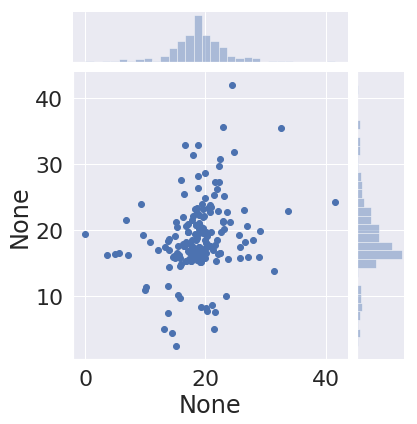

In [3]:
idx = abs(peak_age_m-peak_age_f)<20
sns.jointplot(x=peak_age_m[idx], y=peak_age_f[idx], marginal_kws = {'bins': 30})


In [4]:
print(coefs_data.shape)
print(coefs_data_raw.shape)

(212, 10)
(212, 10)


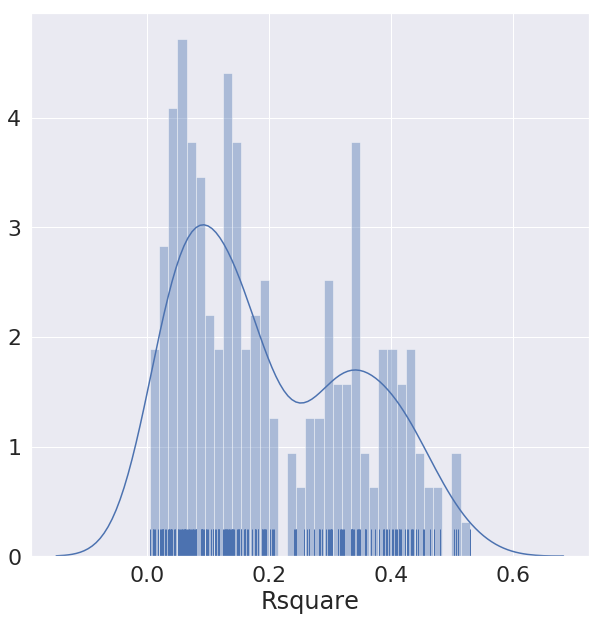

In [5]:
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)
sns.distplot(coefs_data['Rsquare'], bins = 35, rug = True)

In [6]:

# from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)

columns = ['age', 'age$^2$', 'age*gender', 'age*gender$^2$']

cluster_rows = coefs_data['cluster']==111
X_varied = coefs_data.loc[cluster_rows, columns]

# scaler = RobustScaler()
scaler = MinMaxScaler()
scaler.fit(X_varied)
X_scale = scaler.transform(X_varied)
# X_varied = preprocessing.scale(X_varied)

print(X_varied.mean(axis = 0))
print(X_varied.std(axis = 0))

print(X_scale.mean(axis = 0))
print(X_scale.std(axis = 0))

# plt.figure()
# plt.plot(X_scale[:,0], X_scale[:,1], '*')




age               0.336451
age$^2$           0.008750
age*gender        0.099964
age*gender$^2$    0.003351
dtype: float64
age               0.136269
age$^2$           0.005010
age*gender        0.071228
age*gender$^2$    0.002412
dtype: float64
[0.38764768 0.27262623 0.33079061 0.31515221]
[0.16386039 0.15617198 0.23639857 0.23234787]


In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics

Sum_of_squared_distances = []
sils_euclidean=[]
sils_manhattan=[]
K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scale)
    Sum_of_squared_distances.append(km.inertia_)
    
    labels = km.predict(X_scale)
    sil_euc=metrics.silhouette_score(X_scale, labels, metric='euclidean')
    sil_man=metrics.silhouette_score(X_scale, labels, metric='manhattan')
    
    sils_euclidean.append(sil_euc)    
    sils_manhattan.append(sil_man)    



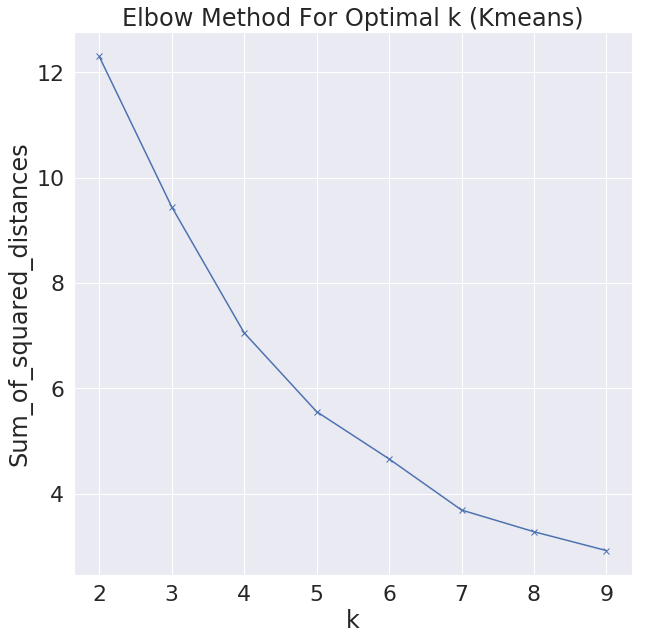

In [8]:
 
plt.plot(K, Sum_of_squared_distances, 'bx-') 
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (Kmeans)')
plt.show()


Text(0,0.5,'Score')

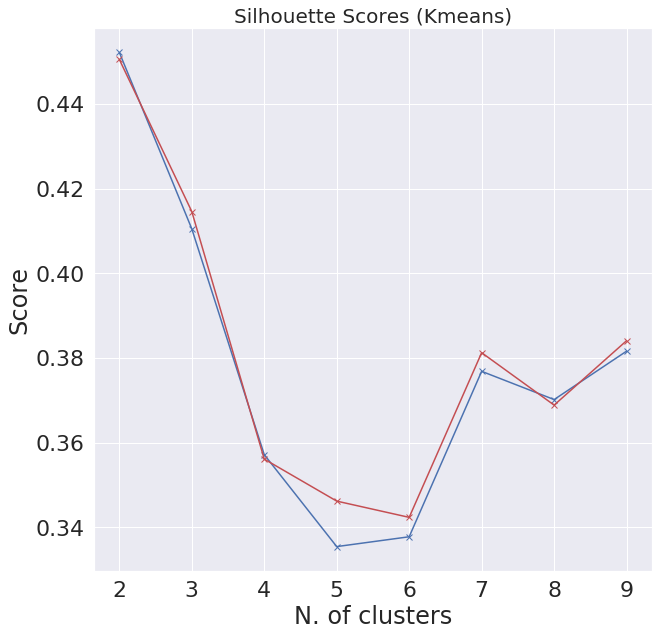

In [9]:

plt.plot(K, sils_euclidean, 'bx-')
plt.plot(K, sils_manhattan, 'rx-')
plt.title("Silhouette Scores (Kmeans)", fontsize=20)
plt.xticks(K)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [10]:
# cluster_k = 5
# y_pred = KMeans(n_clusters=cluster_k, random_state=111).fit_predict(X_scale)
# coefs_data.loc[coefs_data['cluster']>0, 'cluster'] = y_pred+1
# coefs_data_raw.loc[coefs_data_raw['cluster']>0, 'cluster'] = y_pred+1
X_scale.shape

(149, 4)

In [11]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]


#Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. 
#Here the difference is that we take the squared root, so it's a proper metric

def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)


n_clusters=np.arange(2, 10)

sils=[]
sils_err=[]

bics=[]
bics_err=[]

js_dist=[]
js_err=[]

iterations=20
for n in n_clusters:
    print(n)
    
    tmp_sil=[]
    tmp_bic=[]
    tmp_dist=[]
    
    for itr in range(iterations):
        #print(itr)
        
        gmm=GMM(n, n_init=20).fit(X_scale) 
        labels=gmm.predict(X_scale)
        sil=metrics.silhouette_score(X_scale, labels, metric='manhattan')
        tmp_sil.append(sil)
        tmp_bic.append(gmm.bic(X_scale))
        
        train, test=train_test_split(X_scale, test_size=0.5)
        
        gmm_train=GMM(n, n_init=20).fit(train) 
        gmm_test=GMM(n, n_init=20).fit(test) 
        tmp_dist.append(gmm_js(gmm_train, gmm_test))
        
    val=np.mean(SelBest(np.array(tmp_dist), int(iterations/5)))
    err=np.std(tmp_dist)
    js_dist.append(val)
    js_err.append(err)
        
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)
    
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)
    

2
3
4
5
6
7
8
9


Text(0,0.5,'Score')

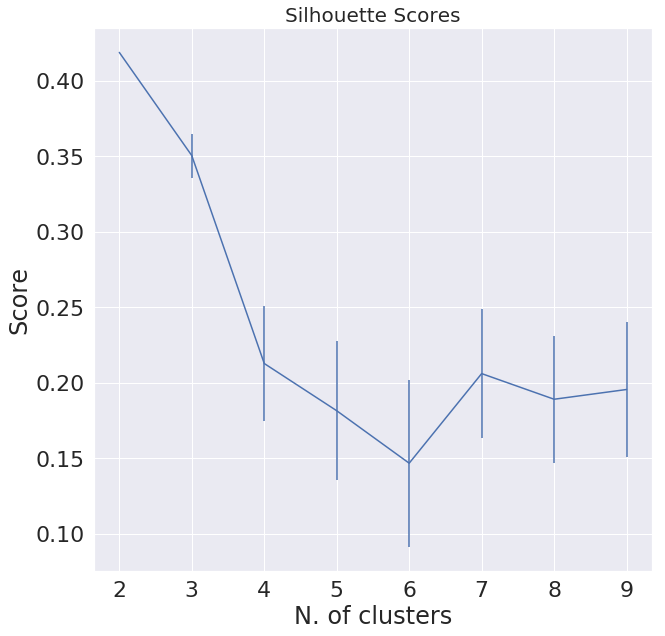

In [12]:
# The silhouette ranges from −1 to +1, where a high value indicates that the object is 
# well matched to its own cluster and poorly matched to neighboring clusters. 

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

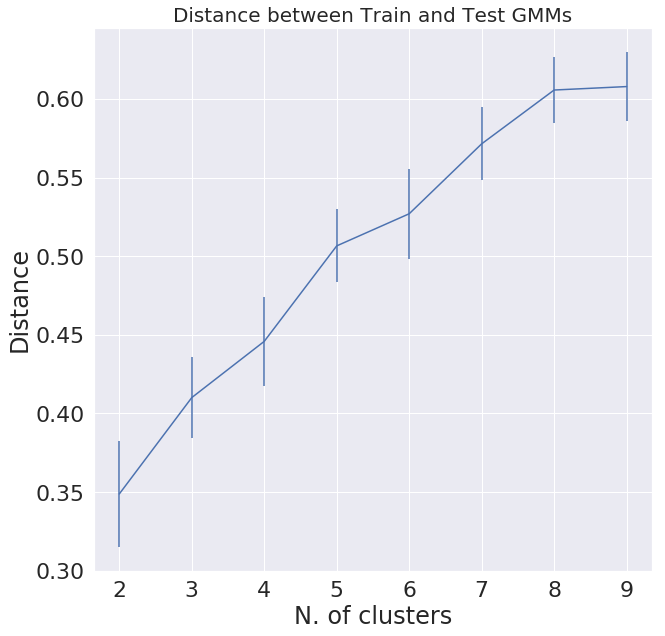

In [13]:

plt.errorbar(n_clusters, js_dist, yerr=js_err)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

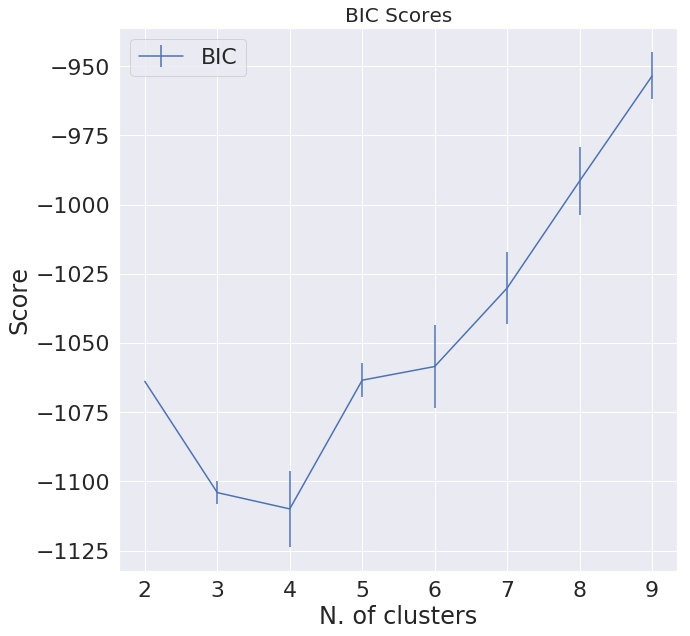

In [14]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

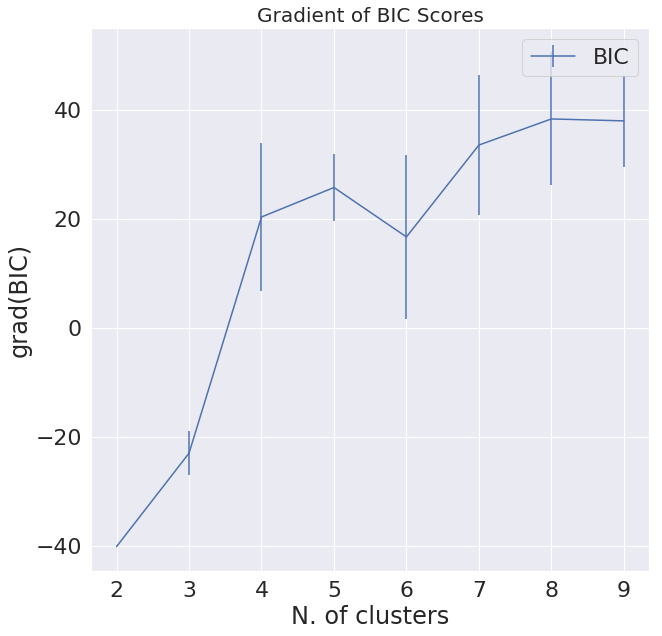

In [15]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [16]:
from sklearn.metrics.cluster import contingency_matrix

def align_cluster_index(ref_cluster, map_cluster):
    """
    remap cluster index according the the ref_cluster.
    both inputs must be nparray and have same number of unique cluster index values.
    
    Xin Niu Jan-15-2020
    """
    
    ref_values = np.unique(ref_cluster)
    map_values = np.unique(map_cluster)
    
#     print(ref_values)
#     print(map_values)
    
    num_values = ref_values.shape[0]
    
    if ref_values.shape[0]!=map_values.shape[0]:
        print('error: both inputs must have same number of unique cluster index values.')
        return()
    
    switched_col = set()
    while True:
        cont_mat = contingency_matrix(ref_cluster, map_cluster)
#         print(cont_mat)
        # divide contingency_matrix by its row and col sums to avoid potential duplicated values:
        col_sum = np.matmul(np.ones((num_values, 1)), np.sum(cont_mat, axis = 0).reshape(1, num_values))
        row_sum = np.matmul(np.sum(cont_mat, axis = 1).reshape(num_values, 1), np.ones((1, num_values)))
#         print(col_sum)
#         print(row_sum)
        
        cont_mat = cont_mat/(col_sum+row_sum)
#         print(cont_mat)
        
        # ignore columns that have been switched:
        cont_mat[:, list(switched_col)]=-1
        
#         print(cont_mat)

        sort_0 = np.argsort(cont_mat, axis = 0)
        sort_1 = np.argsort(cont_mat, axis = 1)

#         print('argsort contmat:')
#         print(sort_0)
#         print(sort_1)

        if np.array_equal(sort_1[:,-1], np.array(range(num_values))):
            break

        # switch values according to the max value in the contingency matrix:
        # get the position of max value:
        idx_max = np.unravel_index(np.argmax(cont_mat, axis=None), cont_mat.shape)
#         print(cont_mat)
#         print(idx_max)

        if (cont_mat[idx_max]>0) and (idx_max[0] not in switched_col):
            cluster_tmp = map_cluster.copy()
            print('switch', map_values[idx_max[1]], 'and:', ref_values[idx_max[0]])
            map_cluster[cluster_tmp==map_values[idx_max[1]]]=ref_values[idx_max[0]]
            map_cluster[cluster_tmp==map_values[idx_max[0]]]=ref_values[idx_max[1]]

            switched_col.add(idx_max[0])
            print(switched_col)

        else:
            break

#     print('final argsort contmat:')
#     print(sort_0)
#     print(sort_1)
    

    
    cont_mat = contingency_matrix(ref_cluster, map_cluster)
    col_sum = np.matmul(np.ones((num_values, 1)), np.sum(cont_mat, axis = 0).reshape(1, num_values))
    row_sum = np.matmul(np.sum(cont_mat, axis = 1).reshape(num_values, 1), np.ones((1, num_values)))
    cont_mat = cont_mat/(col_sum+row_sum)
    print('final cont_mat:')
    print(cont_mat)
    
    return(map_cluster)
    

In [17]:
# test align_cluster_index:
# ref_cluster = np.array([2,2,3,1,0,0,0,1,1,1,2,2,0,3,3,3,3])
# map_cluster = np.array([0,0,0,1,1,3,2,3,2,2,0,0,0,2,0,3,3])

# ref_cluster = np.array([2,2,3,1,0,0,0,1,2,1,2,2,0,3,3,3,3])
# map_cluster = np.array([0,0,0,1,1,3,2,3,2,2,0,0,0,2,0,3,3])

# c = align_cluster_index(ref_cluster, map_cluster)
# print(ref_cluster)
# print(c)

In [18]:
np.set_printoptions(threshold=1000)
cluster_km = 7

############# K means #####################

km = KMeans(n_clusters=cluster_km, n_init=20)
km = km.fit(X_scale)
km_cluster = km.predict(X_scale)


############# GMM #########################
cluster_gmm = 8

repetition = 10
y_pred = np.zeros((X_scale.shape[0], repetition))+1111
y_pred2 = np.zeros((X_scale.shape[0], repetition))+1111

for i in range(repetition):
    dpgmm = GMM(n_components=cluster_gmm, n_init = 50, covariance_type='full', random_state = i).fit(X_scale)
    y_pred[:, i] = dpgmm.predict(X_scale)


y_pred2[:,0] = y_pred[:,0]

for i in range(1, repetition):
    y_pred2[:,i] = align_cluster_index(y_pred[:,0], y_pred[:,i])
#     print('original and aligned cluster index:')
#     print(np.vstack((y_pred[:,0], y_pred[:,i], y_pred2[:,i])))


    

switch 1.0 and: 6.0
{6}
switch 2.0 and: 7.0
{6, 7}
switch 1.0 and: 4.0
{4, 6, 7}
switch 3.0 and: 1.0
{1, 4, 6, 7}
switch 0.0 and: 3.0
{1, 3, 4, 6, 7}
switch 0.0 and: 2.0
{1, 2, 3, 4, 6, 7}
switch 5.0 and: 5.0
{1, 2, 3, 4, 5, 6, 7}
final cont_mat:
[[0.         0.18421053 0.         0.         0.11392405 0.18461538
  0.         0.        ]
 [0.05714286 0.38571429 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.33333333 0.         0.         0.05882353
  0.         0.        ]
 [0.12903226 0.         0.         0.375      0.         0.10909091
  0.         0.        ]
 [0.         0.         0.         0.         0.41772152 0.01538462
  0.         0.02380952]
 [0.         0.         0.         0.         0.01818182 0.2195122
  0.06666667 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.42857143 0.        ]
 [0.         0.         0.         0.         0.01960784 0.
  0.         0.42857143]]
switch 3.0 and: 2.0
{2}
switch 0.

In [19]:
np.set_printoptions(threshold=5000)
y_pred_consistent = np.zeros(X_scale.shape[0])+110


for ik in range(cluster_gmm):
    ik_count = np.sum(y_pred2==ik, axis = 1)
    y_pred_consistent[ik_count>7]=ik

print(y_pred_consistent)
print(np.sum(y_pred_consistent!=110)/y_pred_consistent.shape)

[[1. 3. 3. 5. 4. 6. 6. 2. 3. 5. 5. 4. 5. 1. 1. 0. 7. 3. 1. 0. 0. 3. 1. 0.
  4. 0. 0. 0. 4. 0. 0. 1. 1. 4. 7. 1. 1. 3. 0. 3. 3. 4. 4. 1. 1. 4. 0. 4.
  1. 3. 4. 1. 1. 3. 3. 3. 1. 1. 0. 1. 0. 1. 7. 4. 4. 0. 0. 4. 3. 3. 0. 1.
  5. 1. 3. 3. 3. 4. 0. 4. 4. 4. 4. 6. 2. 0. 1. 0. 0. 0. 5. 4. 1. 0. 0. 1.
  0. 7. 4. 7. 7. 1. 4. 4. 7. 1. 1. 3. 1. 0. 4. 4. 3. 4. 0. 5. 4. 4. 3. 0.
  4. 0. 4. 5. 1. 1. 0. 2. 4. 4. 0. 5. 3. 0. 3. 3. 0. 0. 4. 2. 0. 4. 3. 3.
  5. 0. 4. 5. 4.]
 [1. 3. 3. 0. 4. 6. 6. 2. 5. 0. 6. 4. 0. 1. 1. 1. 7. 5. 1. 1. 1. 5. 5. 0.
  4. 1. 1. 1. 4. 0. 1. 1. 1. 4. 7. 1. 1. 3. 1. 3. 3. 4. 4. 1. 1. 4. 1. 4.
  1. 3. 4. 1. 1. 3. 3. 3. 1. 1. 0. 1. 0. 1. 7. 4. 4. 1. 1. 4. 3. 5. 0. 1.
  0. 1. 5. 5. 5. 4. 1. 4. 4. 4. 4. 6. 2. 1. 1. 1. 1. 0. 1. 4. 1. 0. 1. 1.
  1. 7. 4. 7. 7. 1. 4. 4. 7. 1. 1. 3. 1. 0. 4. 4. 3. 4. 0. 0. 4. 4. 3. 0.
  4. 0. 4. 0. 1. 1. 0. 5. 4. 4. 0. 0. 3. 0. 3. 3. 0. 0. 4. 5. 0. 4. 3. 3.
  0. 0. 4. 0. 4.]]
[1 0 0 4 1 0 0 0 2 4 1 0 4 0 1 3 0 2 0 3 3 2 2 6 1 3 3 3 1 5 3 0 0 1 0 0 0


In [20]:
coefs_data.loc[cluster_rows, 'cluster'] = km_cluster+1
coefs_data_raw.loc[cluster_rows, 'cluster'] = km_cluster+1

coefs_data.loc[cluster_rows, 'cluster_gmm'] = y_pred_consistent+1
coefs_data_raw.loc[cluster_rows, 'clustergmm'] = y_pred_consistent+1



In [21]:
y_pred_consistent.shape
coefs_data.loc[coefs_data['cluster']==111, 'cluster'].shape

(0,)

In [22]:
pd.set_option('display.max_rows', 500)

# clusters with R square less than thresh:
print(coefs_data_raw.loc[coefs_data['cluster']==999,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==999,:]

(63, 12)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,peak_age_m,peak_age_f,cluster,clustergmm
0,ABF_Accuracy,behav,0.181908,-0.005024,-1.735781,0.280883,-0.009891,0.068020,15.514903,10.167222,NaN,NaN
3,VMEM_Accuracy,behav,0.155324,-0.004781,-0.593761,0.083459,-0.003092,0.040648,15.165262,21.276371,NaN,NaN
5,SMEM_Accuracy,behav,0.102200,-0.002266,0.636339,-0.075789,0.002458,0.077588,-68.785636,18.836209,NaN,NaN
9,EID_Accuracy,behav,0.020068,0.000331,0.711017,-0.112703,0.003969,0.026109,10.770473,18.248278,NaN,NaN
12,ABF_Speed,behav,0.432339,-0.014171,0.265554,0.008080,-0.001647,0.026106,13.921153,16.937514,NaN,NaN
14,WM_Speed,behav,0.085964,-0.001830,-0.141574,0.019968,-0.000618,0.028956,21.637030,27.244836,NaN,NaN
16,FMEM_Speed,behav,0.456405,-0.014441,-0.091945,0.034407,-0.001649,0.050859,15.251810,16.494124,NaN,NaN
17,SMEM_Speed,behav,0.482723,-0.014330,-0.658372,0.096474,-0.003339,0.039282,16.390017,17.569903,NaN,NaN
19,NVR_Speed,behav,0.019308,-0.001740,0.358463,-0.072316,0.002873,-0.023640,23.388468,9.930438,NaN,NaN
20,SPA_Speed,behav,0.084291,-0.004681,0.780951,-0.112866,0.003692,0.059497,-14.444190,11.773945,NaN,NaN


In [23]:
pd.set_option('display.max_rows', 500)

# clusters with R squared higher than threshold but inconsistent index:
print(coefs_data_raw.loc[coefs_data['cluster']==111,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==111,:]

(0, 12)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,peak_age_m,peak_age_f,cluster,clustergmm


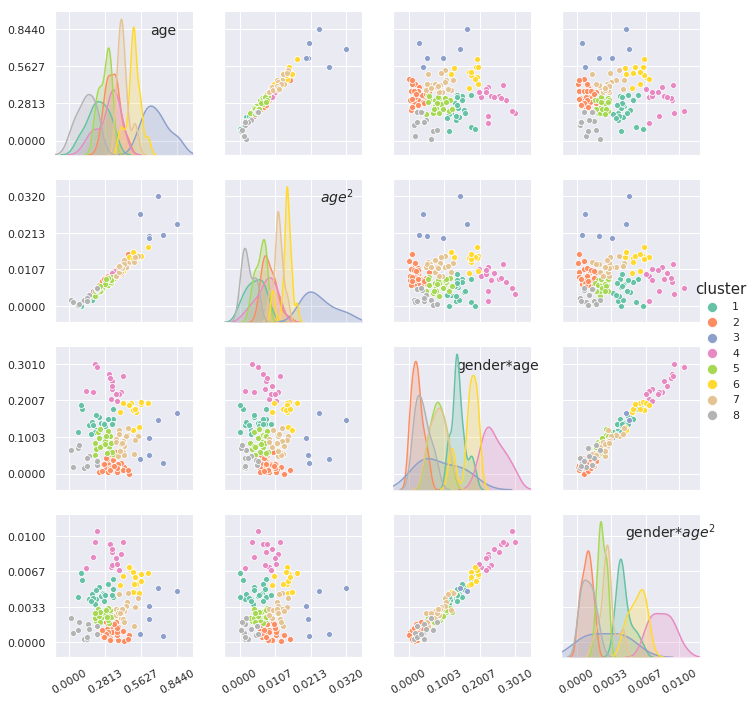

In [24]:
# make pair plots:
sns.set(rc={'figure.figsize':(12, 12)}, font_scale = 1)
import numpy as np

plot_data = coefs_data.loc[coefs_data['cluster']<10, :]

# change cluster index
# coefs_data.replace({'cluster': {1: 11, 2: 12, 3:13, 4: 14}}, inplace = True)
# coefs_data.replace({'cluster': {12: 1, 14: 2, 11: 3, 13: 4}}, inplace = True)
# column_label = ['age', 'age$^2$', 'gender', 'age*gender', 'age*gender$^2$', 'Rsquare']

# plt.figure()

def plot_cluster(plot_data, label_var):

    g = sns.pairplot(plot_data, kind="scatter", hue=label_var,
                     vars=['age', 'age$^2$', 'age*gender', 'age*gender$^2$'], palette="Set2")

    text_size = 14
    g.axes[0, 0].text(max(plot_data[columns[0]])*.75, 
                      max(plot_data[columns[0]])*.95, 
                      'age', fontsize = text_size)
    g.axes[1, 1].text(max(plot_data[columns[1]])*.75, 
                      max(plot_data[columns[1]])*.95, 
                      '$age^2$', fontsize = text_size)
    g.axes[2, 2].text(max(plot_data[columns[2]])*.45, 
                      max(plot_data[columns[2]])*.95, 
                      'gender*age', fontsize = text_size)
    g.axes[3, 3].text(max(plot_data[columns[3]])*.45, 
                      max(plot_data[columns[3]])*.95, 
                      'gender*$age^2$', fontsize = text_size)


    num_vars = len(columns)

    for idx in range(num_vars):
        g.axes[num_vars-1, idx].set_xlabel('')
        g.axes[idx, 0].set_ylabel('')


    for idx1 in range(num_vars):
        for idx2 in range(num_vars):
            offset1 = (max(plot_data.loc[:, columns[idx1]]) - 
                       min(plot_data.loc[:, columns[idx1]]))*.15
            offset2 = (max(plot_data.loc[:, columns[idx2]]) - 
                       min(plot_data.loc[:, columns[idx2]]))*.15

            limit_idx1 = [min(plot_data.loc[:, columns[idx1]])-offset1, 
                          max(plot_data.loc[:, columns[idx1]])+offset1]

            limit_idx2 = [min(plot_data.loc[:, columns[idx2]])-offset2,
                          max(plot_data.loc[:, columns[idx2]])+offset2]

            g.axes[idx1, idx2].set_ylim(limit_idx1[0], limit_idx1[1])
            g.axes[idx1, idx2].set_yticks(np.round(np.linspace(0, round(limit_idx1[1]-offset1,3), num=4), 4))

            g.axes[idx1, idx2].set_xlim(limit_idx2[0], limit_idx2[1])
            g.axes[idx1, idx2].set_xticks(np.round(np.linspace(0, round(limit_idx2[1]-offset2,3), num=4), 4))

            if idx1==num_vars-1:
                #g.axes[idx1, idx2].set_xticklabels(g.axes[idx1, idx2].get_xticklabels(), rotation=30)
                plt.setp(g.axes[idx1, idx2].get_xticklabels(), rotation=30)


    # ticks = g.axes[3][1].get_xticks()
    # xlabels = ['{:1.1e}'.format(x) for x in ticks]
    # g.axes[3][1].set_xticklabels(xlabels)
    # g.axes[1][3].set_yticklabels(xlabels)

    plt.setp(g._legend.get_title(), fontsize=15)


    for lh in g._legend.legendHandles: 
        lh.set_alpha(1)
        lh._sizes = [100] 

    plt.show()
    
plot_cluster(plot_data, 'cluster')


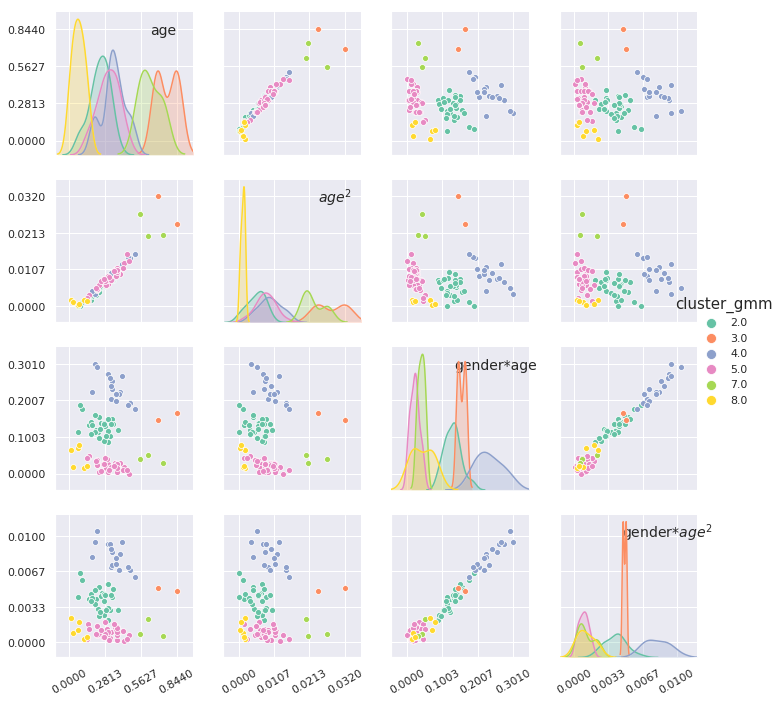

In [25]:
plot_data = coefs_data.loc[coefs_data['cluster_gmm']<10, :]
plot_cluster(plot_data, 'cluster_gmm')

In [26]:

coefs_summary = coefs_data.groupby('cluster').mean()
print(coefs_summary.columns)
# coefs_summary.columns = ['R$^2$', 'age', 'age$^2$', 'gender', 'gender*age', 'gender*age$^2$',\
#                          'Peak age(M)','Peak age(F)']
coefs_summary

Index(['age', 'age$^2$', 'gender', 'age*gender', 'age*gender$^2$', 'Rsquare',
       'cluster_gmm'],
      dtype='object')


,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,cluster_gmm
cluster,,,,,,,
1,0.228469,0.004632,1.094526,0.142187,0.004644,0.284823,7.190476
2,0.341032,0.008927,0.229404,0.024781,0.000996,0.237366,23.705882
3,0.680047,0.023938,0.620938,0.088684,0.002794,0.370557,23.000000
4,0.309536,0.007903,1.718436,0.242765,0.008309,0.202258,11.133333
5,0.280021,0.006274,0.695685,0.084448,0.002495,0.310676,74.666667
6,0.506459,0.014033,1.239440,0.171246,0.005898,0.323424,89.600000
7,0.425136,0.011650,0.607183,0.084329,0.003030,0.263479,105.809524
8,0.136129,0.002696,0.345065,0.040477,0.001121,0.176795,6.384615
999,0.192594,0.005818,0.719100,0.100851,0.003447,0.051120,999.000000


In [27]:
coefs_summary = coefs_data.groupby('cluster_gmm').mean()
print(coefs_summary.columns)
# coefs_summary.columns = ['R$^2$', 'age', 'age$^2$', 'gender', 'gender*age', 'gender*age$^2$',\
#                          'Peak age(M)','Peak age(F)']
coefs_summary

Index(['age', 'age$^2$', 'gender', 'age*gender', 'age*gender$^2$', 'Rsquare',
       'cluster'],
      dtype='object')


,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,cluster
cluster_gmm,,,,,,,
2.0,0.242806,0.005291,1.025411,0.129796,0.004025,0.262816,2.310345
3.0,0.769857,0.027985,1.145399,0.155759,0.004909,0.481597,3.000000
4.0,0.351395,0.009461,1.640967,0.233759,0.008094,0.194351,4.352941
5.0,0.311222,0.008132,0.211816,0.022949,0.000919,0.204249,3.200000
7.0,0.638122,0.022620,0.241750,0.041191,0.001172,0.383108,3.000000
8.0,0.076186,0.001226,0.364111,0.044644,0.001148,0.176062,8.000000
111.0,0.391441,0.010064,0.746738,0.099131,0.003379,0.319380,5.473684
999.0,0.192594,0.005818,0.719100,0.100851,0.003447,0.051120,999.000000


In [28]:
# coefs_data.to_csv(result_dir+'/out02_coefs_cluster_gmm.csv')
coefs_data.to_csv(result_dir+'/out02_coefs_cluster.csv')

In [29]:
print(coefs_data_raw.loc[coefs_data['cluster_gmm']==1,:].shape)
coefs_data_raw.loc[coefs_data['cluster_gmm']==1,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])

(0, 12)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,peak_age_m,peak_age_f,cluster,clustergmm


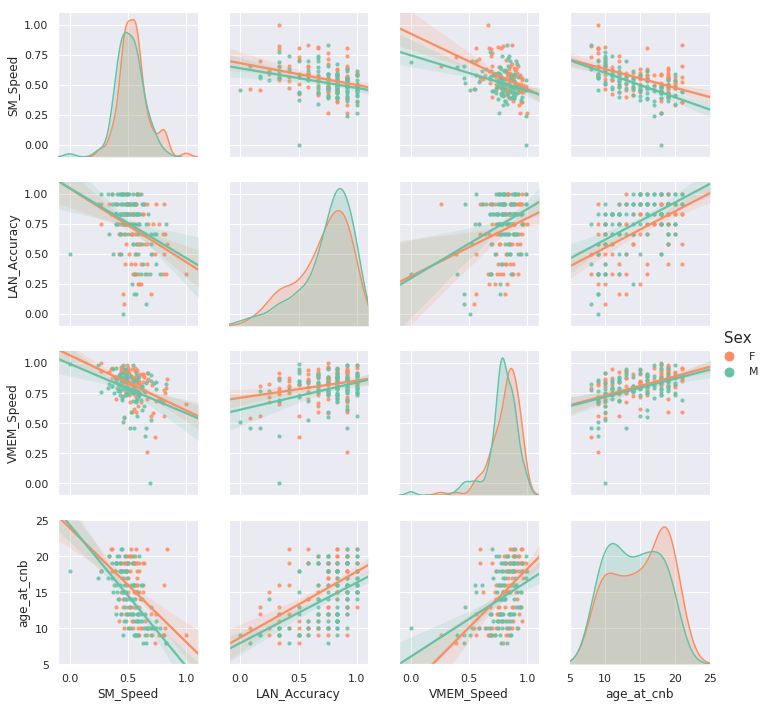

In [30]:
# make pair plots:
behav_feature = pd.read_csv(result_dir+'/out01_behav_feature.csv', index_col=0)

def pair_plot_raw(behav_feature, feature_list):

    behav_feature.dropna(axis='index', inplace = True)
    behav_feature['Sex'] = behav_feature['Sex'].apply({-1:'F', 1:'M'}.get)
    # print(behav_feature)

    palette = sns.color_palette("Set2", n_colors=2)
    palette.reverse()


    g = sns.pairplot(behav_feature, kind="reg", hue = 'Sex', plot_kws=dict(scatter_kws=dict(s=10)),
                     vars=feature_list+['age_at_cnb'], 
                     palette=palette, dropna = True)


    plot_rows = len(feature_list)+1
    for idx1 in range(plot_rows-1):
        for idx2 in range(plot_rows-1):
            g.axes[idx1, idx2].set_xlim(-.1, 1.1)
            g.axes[idx1, idx2].set_ylim(-.1, 1.1)

    for idx in range(plot_rows):
        g.axes[idx, plot_rows-1].set_xlim(5, 25)
        g.axes[plot_rows-1, idx].set_ylim(5, 25)

    plt.setp(g._legend.get_title(), fontsize=15)

    for lh in g._legend.legendHandles: 
        lh.set_alpha(1)
        lh._sizes = [80] 

In [31]:
print(coefs_data_raw.loc[coefs_data['cluster_gmm']==2,:].shape)
coefs_data_raw.loc[coefs_data['cluster_gmm']==2,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])

(29, 12)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,peak_age_m,peak_age_f,cluster,clustergmm
1,ATT_Accuracy,behav,0.308830,-0.007711,0.924346,-0.087803,0.002047,0.188576,19.512967,20.324314,5.0,2.0
48,Left Superior Medial Frontal,gmv,-0.233077,0.004171,1.169338,-0.155994,0.005209,0.427204,20.738788,-37.156230,1.0,2.0
88,Left Supramarginal,gmv,-0.342220,0.007554,0.923472,-0.136801,0.004967,0.402009,19.129286,39.697694,1.0,2.0
49,Right Superior Medial Frontal,gmv,-0.175300,0.001917,1.156040,-0.142883,0.004507,0.392990,24.764952,-6.258261,1.0,2.0
26,Left Precentral,gmv,-0.208754,0.003264,0.952181,-0.120711,0.004026,0.380734,22.595616,-57.792381,1.0,2.0
31,Right Superior Frontal Orbital,gmv,-0.154727,0.001630,1.055742,-0.133232,0.004024,0.343587,25.465527,-4.489592,1.0,2.0
61,Right Cingulum,gmv,-0.276766,0.007083,0.965676,-0.090540,0.002552,0.336165,19.060849,20.550990,5.0,2.0
76,Left Middle Occipital,gmv,-0.304237,0.006932,0.942378,-0.150102,0.005456,0.335774,18.337555,52.210220,1.0,2.0
90,Left Angular,gmv,-0.183034,0.002898,0.945792,-0.132958,0.004155,0.333751,22.402466,-19.915418,1.0,2.0
73,Right Lingual,gmv,-0.339728,0.008035,1.342491,-0.150976,0.004242,0.318325,19.984981,24.886302,1.0,2.0


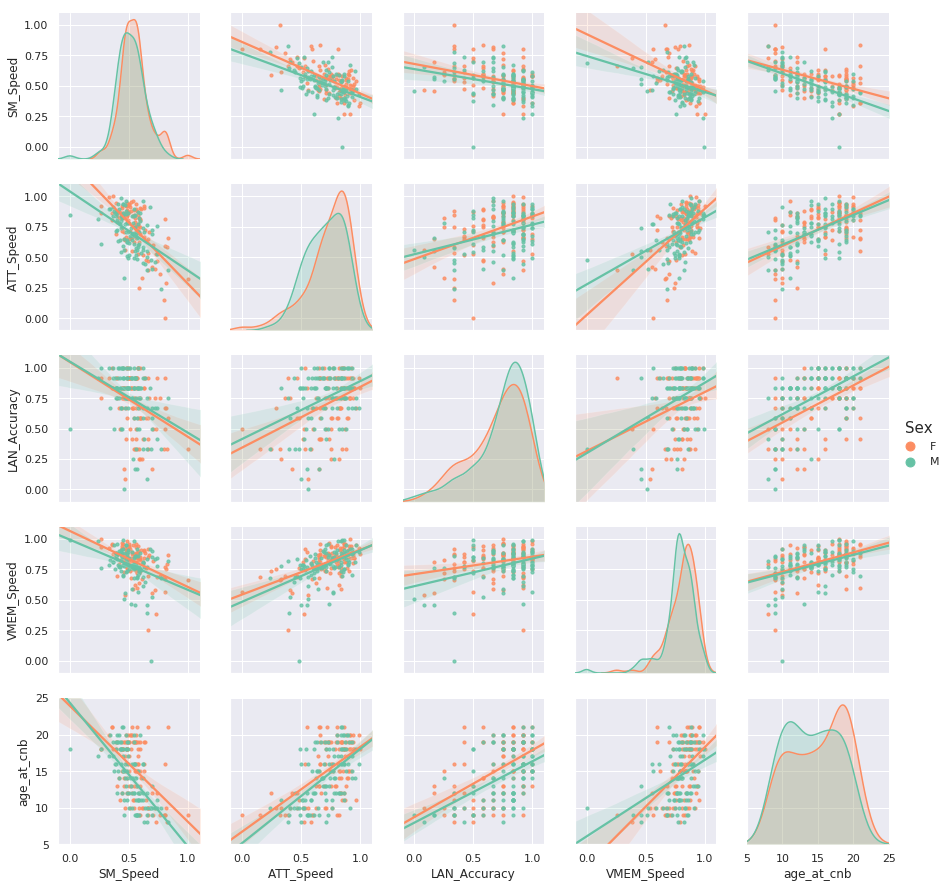

In [32]:
# make pair plots:
behav_feature = pd.read_csv(result_dir+'/out01_behav_feature.csv', index_col=0)
behav_feature.dropna(axis='index', inplace = True)
behav_feature['Sex'] = behav_feature['Sex'].apply({-1:'F', 1:'M'}.get)
# print(behav_feature)

palette = sns.color_palette("Set2", n_colors=2)
palette.reverse()


g = sns.pairplot(behav_feature, kind="reg", hue = 'Sex', plot_kws=dict(scatter_kws=dict(s=10)),
                 vars=['SM_Speed','ATT_Speed','LAN_Accuracy', 'VMEM_Speed', 'age_at_cnb'], 
                 palette=palette, dropna = True)

# 
# g.axes[idx1, idx2].set_yticks(np.round(np.linspace(0, round(limit_idx1[1]-offset1,3), num=4), 4))


for idx1 in range(4):
    for idx2 in range(4):
        g.axes[idx1, idx2].set_xlim(-.1, 1.1)
        g.axes[idx1, idx2].set_ylim(-.1, 1.1)


for idx in range(5):
    g.axes[idx, 4].set_xlim(5, 25)
    g.axes[4, idx].set_ylim(5, 25)

plt.setp(g._legend.get_title(), fontsize=15)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [80] 

In [33]:
print(coefs_data_raw.loc[coefs_data['cluster_gmm']==3,:].shape)
coefs_data_raw.loc[coefs_data['cluster_gmm']==3,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])

(2, 12)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,peak_age_m,peak_age_f,cluster,clustergmm
11,ADI_Accuracy,behav,-0.695734,0.032004,-0.983161,0.146112,-0.005053,0.528936,10.197010,11.358831,3.0,3.0
101,Right Pallidum,gmv,-0.843980,0.023967,1.307636,-0.165407,0.004764,0.434257,17.566077,17.668480,3.0,3.0


In [34]:
print(coefs_data_raw.loc[coefs_data['cluster_gmm']==4,:].shape)
coefs_data_raw.loc[coefs_data['cluster_gmm']==4,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])

(17, 12)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,peak_age_m,peak_age_f,cluster,clustergmm
2,WM_Accuracy,behav,0.325517,-0.008907,-1.356528,0.204056,-0.007062,0.146375,16.581934,32.918434,4.0,4.0
4,FMEM_Accuracy,behav,0.402176,-0.011475,-1.426604,0.224499,-0.008263,0.128487,15.874840,27.654396,4.0,4.0
72,Left Lingual,gmv,-0.387934,0.009341,1.783857,-0.218866,0.006774,0.374080,18.827169,32.938846,4.0,4.0
50,Left Medial Frontal Orbital,gmv,-0.338573,0.007515,1.771977,-0.232479,0.007282,0.357272,19.296538,227.228733,4.0,4.0
71,Right Cuneus,gmv,-0.307783,0.007126,2.021113,-0.273970,0.009274,0.320312,17.736343,-7.868426,4.0,4.0
70,Left Cuneus,gmv,-0.333159,0.007773,1.933668,-0.254945,0.008472,0.298203,18.101904,-55.956611,4.0,4.0
53,Right Rectus,gmv,-0.205269,0.003678,2.247324,-0.300923,0.009424,0.281340,19.318295,8.323618,4.0,4.0
63,Right Hippocampus,gmv,-0.183041,0.004382,-1.653746,0.224198,-0.007985,0.116872,5.711650,16.464293,4.0,4.0
85,Right Superior Parietal,gmv,-0.321006,0.008269,1.726927,-0.261138,0.009197,0.113336,16.664647,-32.244581,4.0,4.0
144,Genu.of.corpus.callosum,label_fa,0.479970,-0.014184,1.370306,-0.194200,0.006748,0.177205,19.214712,16.104225,6.0,4.0


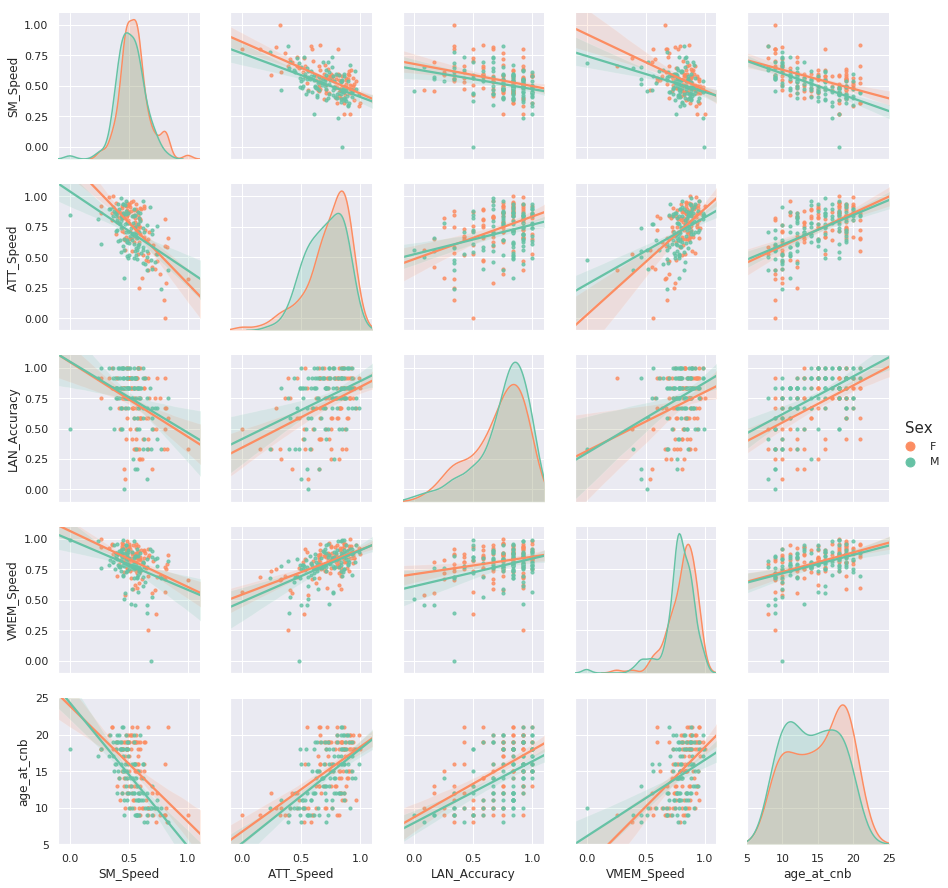

In [35]:
# make pair plots:
behav_feature = pd.read_csv(result_dir+'/out01_behav_feature.csv', index_col=0)
behav_feature.dropna(axis='index', inplace = True)
behav_feature['Sex'] = behav_feature['Sex'].apply({-1:'F', 1:'M'}.get)
# print(behav_feature)

palette = sns.color_palette("Set2", n_colors=2)
palette.reverse()


g = sns.pairplot(behav_feature, kind="reg", hue = 'Sex', plot_kws=dict(scatter_kws=dict(s=10)),
                 vars=['SM_Speed','ATT_Speed','LAN_Accuracy', 'VMEM_Speed', 'age_at_cnb'], 
                 palette=palette, dropna = True)

# 
# g.axes[idx1, idx2].set_yticks(np.round(np.linspace(0, round(limit_idx1[1]-offset1,3), num=4), 4))


for idx1 in range(4):
    for idx2 in range(4):
        g.axes[idx1, idx2].set_xlim(-.1, 1.1)
        g.axes[idx1, idx2].set_ylim(-.1, 1.1)


for idx in range(5):
    g.axes[idx, 4].set_xlim(5, 25)
    g.axes[4, idx].set_ylim(5, 25)

plt.setp(g._legend.get_title(), fontsize=15)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [80] 

In [36]:
print(coefs_data_raw.loc[coefs_data['cluster']==1,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==1,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])


(21, 12)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,peak_age_m,peak_age_f,cluster,clustergmm
48,Left Superior Medial Frontal,gmv,-0.233077,0.004171,1.169338,-0.155994,0.005209,0.427204,20.738788,-37.156230,1.0,2.0
35,Right Middle Frontal Orbital,gmv,-0.343177,0.007865,1.319206,-0.176974,0.005962,0.422761,18.808735,43.671649,1.0,111.0
88,Left Supramarginal,gmv,-0.342220,0.007554,0.923472,-0.136801,0.004967,0.402009,19.129286,39.697694,1.0,2.0
49,Right Superior Medial Frontal,gmv,-0.175300,0.001917,1.156040,-0.142883,0.004507,0.392990,24.764952,-6.258261,1.0,2.0
26,Left Precentral,gmv,-0.208754,0.003264,0.952181,-0.120711,0.004026,0.380734,22.595616,-57.792381,1.0,2.0
31,Right Superior Frontal Orbital,gmv,-0.154727,0.001630,1.055742,-0.133232,0.004024,0.343587,25.465527,-4.489592,1.0,2.0
76,Left Middle Occipital,gmv,-0.304237,0.006932,0.942378,-0.150102,0.005456,0.335774,18.337555,52.210220,1.0,2.0
90,Left Angular,gmv,-0.183034,0.002898,0.945792,-0.132958,0.004155,0.333751,22.402466,-19.915418,1.0,2.0
73,Right Lingual,gmv,-0.339728,0.008035,1.342491,-0.150976,0.004242,0.318325,19.984981,24.886302,1.0,2.0
74,Left Superior Occipital,gmv,-0.272925,0.006024,0.985744,-0.137661,0.004503,0.312740,19.502516,44.469318,1.0,2.0


## Vermis

Lesions to the vermis commonly give rise to clinical depression, inappropriate emotional displays (e.g. unwarranted giggling) in addition to movement disorders.

## Cerebellum

In humans, the cerebellum plays an important role in motor control. It may also be involved in some cognitive functions such as attention and language as well as in regulating fear and pleasure responses.

Functional imaging studies have shown cerebellar activation in relation to language, attention, and mental imagery;; and a variety of non-motor symptoms have been recognized in people with damage that appears to be confined to the cerebellum. In particular, the cerebellar cognitive affective syndrome or Schmahmann's syndrome has been described in adults and children.

## Fusiform

Though the functionality of the fusiform gyrus is not fully understood, it has been linked with various neural pathways related to recognition. Additionally, it has been linked to various neurological phenomena such as synesthesia, dyslexia, and prosopagnosia.

## Inferior Occipital

Face processing
https://www.sciencedirect.com/science/article/pii/S0010945214000781

## corticospinal tract

The corticospinal tract is a white matter motor pathway starting at the cerebral cortex that terminates on lower motor neurons and interneurons in the spinal cord, controlling movements of the limbs and trunk.

## Superior Parietal

The superior parietal lobule is involved with spatial orientation, and receives a great deal of visual input as well as sensory input from one's hand.

There are major white matter pathway connections with the superior parietal lobule such as the Cingulum.

## external capsule
The white matter of the external capsule contains fibers known as corticocortical association fibers. These fibers are responsible for connecting the cerebral cortex to another cortical area.

## Superior Temporal Pole	

The superior temporal gyrus also includes the Wernicke's area, which (in most people) is located in the left hemisphere. It is the major area involved in the comprehension of language. The superior temporal gyrus is involved in auditory processing, including language, but also has been implicated as a critical structure in social cognition.

Social concepts
https://www.pnas.org/content/104/15/6430.short



In [37]:
print(coefs_data_raw.loc[coefs_data['cluster']==2,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==2,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])


(34, 12)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,peak_age_m,peak_age_f,cluster,clustergmm
21,EID_Speed,behav,0.427213,-0.012474,0.176721,-0.017280,0.000091,0.160445,16.552493,17.688422,2.0,5.0
7,NVR_Accuracy,behav,0.364174,-0.010483,-0.040834,0.029596,-0.001291,0.148197,16.721123,18.200117,2.0,5.0
106,Left Superior Temporal,gmv,-0.355211,0.008097,0.506004,-0.050612,0.001697,0.480414,20.717888,23.795333,2.0,111.0
41,Right Inferior Frontal Orbital,gmv,-0.402035,0.009275,0.197774,-0.028465,0.001058,0.464021,20.830029,22.732478,2.0,5.0
43,Right Rolandic Operculum,gmv,-0.319646,0.006671,0.556618,-0.055302,0.001425,0.432189,23.157379,25.195686,2.0,111.0
42,Left Rolandic Operculum,gmv,-0.342969,0.007912,0.356842,-0.038826,0.001410,0.414384,20.477593,23.391051,2.0,111.0
37,Right Inferior Frontal Operculum,gmv,-0.284613,0.006186,-0.006428,0.035108,-0.001883,0.359515,28.994581,19.811792,2.0,5.0
36,Left Inferior Frontal Operculum,gmv,-0.328204,0.007339,-0.249615,0.042788,-0.001416,0.357718,24.094048,21.185359,2.0,111.0
59,Right Middle Cingulum,gmv,-0.305345,0.006482,0.597735,-0.051228,0.001630,0.346155,21.977574,26.189850,2.0,111.0
99,Right Putamen,gmv,-0.424093,0.011175,0.002834,0.010455,-0.001004,0.337666,20.332809,17.839645,2.0,5.0


## Left inferior frontal 

Language comprehension and production

The left IFG has also been suggested to play a role in inhibitory processes, including the tendency to inhibit learning from undesirable information. For example, transcranial magnetic stimulation to the left IFG has been shown to release such inhibition, increasing the ability to learn from undesirable information.

Inhibition executive control
https://www.sciencedirect.com/science/article/pii/S1364661304000531

Top-down modulation of visual feature processing
https://www.sciencedirect.com/science/article/pii/S1053811910008566

## Left Middle Frontal	

Social anxiety disorder
https://europepmc.org/abstract/med/27680692

https://www.frontiersin.org/articles/10.3389/fnsys.2015.00023/full

## Cingulum
There are two primary parts of the cingulate cortex: the posterior cingulate cortex and the anterior cingulate cortex. The anterior is linked to emotion, especially apathy and depression. Here function and structure changes are related meaning any change within this structure would lead to a function change, particularly behavioral because of its function involving emotions. Damage to this area can have various effects on mental disorders and mental health. The posterior section is more related to cognitive functions. This can include attention, visual and spatial skills, working memory and general memory. Because of its location, the cingulum is very important to brain structure connectivity and the integration of information that it receives.


## Superior Occipital
The ventral stream is known for the processing the "what" in vision, while the dorsal stream handles the "where/how." This is because the ventral stream provides important information for the identification of stimuli that are stored in memory. With this information in memory, the dorsal stream is able to focus on motor actions in response to the outside stimuli.

## caudate

While the caudate nucleus has long been associated with motor processes due to its role in Parkinson's disease, it plays important roles in various other nonmotor functions as well, including procedural learning, associative learning and inhibitory control of action, among other functions. The caudate is also one of the brain structures which compose the reward system and functions as part of the cortico–basal ganglia–thalamic loop.




In [38]:
pd.set_option('display.max_rows', 500)
print(coefs_data_raw.loc[coefs_data['cluster']==3,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==3,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])

(6, 12)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,peak_age_m,peak_age_f,cluster,clustergmm
11,ADI_Accuracy,behav,-0.695734,0.032004,-0.983161,0.146112,-0.005053,0.528936,10.197010,11.358831,3.0,3.0
10,EDI_Accuracy,behav,-0.555430,0.026727,-0.385288,0.041609,-0.000779,0.503398,9.900853,10.852863,3.0,7.0
8,SPA_Accuracy,behav,0.622627,-0.020388,-0.089805,0.051375,-0.002187,0.239967,14.928283,15.693064,3.0,7.0
18,LAN_Speed,behav,0.626204,-0.019796,-0.709582,0.097014,-0.003427,0.110822,15.571212,16.164542,3.0,111.0
101,Right Pallidum,gmv,-0.843980,0.023967,1.307636,-0.165407,0.004764,0.434257,17.566077,17.668480,3.0,3.0
100,Left Pallidum,gmv,-0.736307,0.020744,0.250156,-0.030589,0.000551,0.405960,18.006647,17.474757,3.0,7.0


/home/xin/environments/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/home/xin/environments/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/xin/environments/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/xin/environments/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered

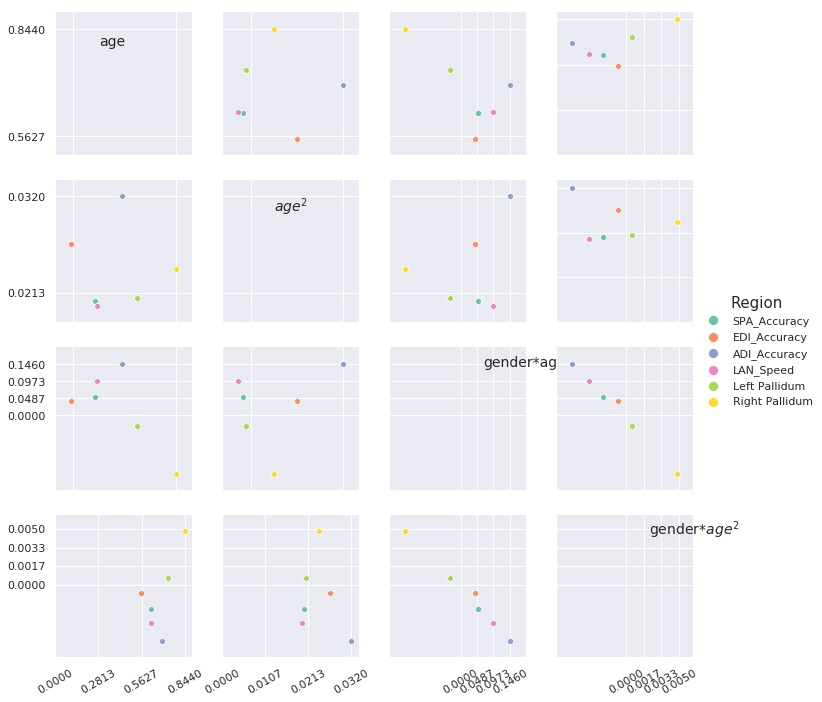

In [39]:
# make pair plots:
sns.set(rc={'figure.figsize':(12, 12)}, font_scale = 1)
import numpy as np

plot_data = coefs_data_raw.loc[coefs_data['cluster']==3,:]
plot_data.rename(columns={'Unnamed: 0': 'Region'}, inplace=True)
plot_data[['age', 'age$^2$']] = abs(plot_data[['age', 'age$^2$']])

plot_cluster(plot_data, 'Region')

## superior temporal

The superior temporal gyrus has been involved in the perception of emotions in facial stimuli.[2] [4]) Furthermore, the superior temporal gyrus is an essential structure involved in auditory processing, as well as in the function of language in individuals who may have an impaired vocabulary, or are developing a sense of language. The superior temporal gyrus has been discovered to be an important structure in the pathway consisting of the amygdala and prefrontal cortex, which are all involved in social cognition processes.


## caudate

While the caudate nucleus has long been associated with motor processes due to its role in Parkinson's disease, it plays important roles in various other nonmotor functions as well, including procedural learning, associative learning and inhibitory control of action, among other functions. The caudate is also one of the brain structures which compose the reward system and functions as part of the cortico–basal ganglia–thalamic loop.

## putamen

The putamen is interconnected with many other structures, and works in conjunction with them to influence many types of motor behaviors. These include motor planning, learning, and execution, motor preparation, specifying amplitudes of movement, and movement sequences.

In [40]:
print(coefs_data.loc[coefs_data['cluster']==4,:].shape)
coefs_data_raw.loc[coefs_data_raw['cluster']==4,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])

(15, 10)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,peak_age_m,peak_age_f,cluster,clustergmm
2,WM_Accuracy,behav,0.325517,-0.008907,-1.356528,0.204056,-0.007062,0.146375,16.581934,32.918434,4.0,4.0
4,FMEM_Accuracy,behav,0.402176,-0.011475,-1.426604,0.224499,-0.008263,0.128487,15.874840,27.654396,4.0,4.0
72,Left Lingual,gmv,-0.387934,0.009341,1.783857,-0.218866,0.006774,0.374080,18.827169,32.938846,4.0,4.0
50,Left Medial Frontal Orbital,gmv,-0.338573,0.007515,1.771977,-0.232479,0.007282,0.357272,19.296538,227.228733,4.0,4.0
71,Right Cuneus,gmv,-0.307783,0.007126,2.021113,-0.273970,0.009274,0.320312,17.736343,-7.868426,4.0,4.0
70,Left Cuneus,gmv,-0.333159,0.007773,1.933668,-0.254945,0.008472,0.298203,18.101904,-55.956611,4.0,4.0
53,Right Rectus,gmv,-0.205269,0.003678,2.247324,-0.300923,0.009424,0.281340,19.318295,8.323618,4.0,4.0
52,Left Rectus,gmv,-0.130742,0.001464,1.702618,-0.225867,0.006989,0.204753,21.091650,8.608841,4.0,111.0
63,Right Hippocampus,gmv,-0.183041,0.004382,-1.653746,0.224198,-0.007985,0.116872,5.711650,16.464293,4.0,4.0
85,Right Superior Parietal,gmv,-0.321006,0.008269,1.726927,-0.261138,0.009197,0.113336,16.664647,-32.244581,4.0,4.0


## Rectus
    
A specific function for the straight gyrus has not yet been brought to light; however, in males, greater activation of the straight gyrus within the medial orbitofrontal cortex while observing sexually visual pictures has been strongly linked to HSDD (hypoactive sexual desire disorder)

## Anterior cingulate gyrus
    
It is an integral part of the limbic system, which is involved with **emotion formation** and **processing**, **learning and memory**. It also plays a role in executive function and respiratory control.

Takahashi et al. (2003) found that the rostral anterior cingulate gyrus is larger in control (healthy) females than males, but this sex difference was not found in people with **schizophrenia**. People with schizophrenia also had a smaller volume of perigenual cingulate gyrus than control subjects

## hippocampus

The hippocampus is part of the limbic system, and plays important roles in the **consolidation of information from short-term memory to long-term memory**, and in **spatial memory** that enables navigation.

The hippocampus contains high levels of glucocorticoid receptors, which make it more vulnerable to long-term stress than most other brain areas. There is evidence that humans having experienced severe, long-lasting traumatic stress show atrophy of the hippocampus more than of other parts of the brain. These effects show up in **post-traumatic stress disorder**, and they may contribute to the hippocampal atrophy reported in **schizophrenia**. and severe **depression**. A recent study has also revealed atrophy as a result of **depression**, but this can be stopped with anti-depressants even if they are not effective in relieving other symptoms.

## corona radiata

Evidence from subcortical small infarcts suggests that motor fibers are somatotopically arranged in the human corona radiata.

## cuneus

In addition to its traditional role as a site for basic **visual processing**, gray matter volume in the cuneus is associated with better **inhibitory control** in **bipolar depression** patients. Pathologic gamblers have higher activity in the dorsal visual processing stream including the cuneus relative to controls.

## Middle occipital
The occipital lobe is the visual processing center of the mammalian brain containing most of the anatomical region of the visual cortex.

## Superior Parietal

The superior parietal lobule is involved with spatial orientation, and receives a great deal of visual input as well as sensory input from one's hand.

There are major white matter pathway connections with the superior parietal lobule such as the Cingulum.

In [41]:
print(coefs_data.loc[coefs_data['cluster']==5,:].shape)
coefs_data.loc[coefs_data['cluster']==5,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])

(24, 10)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,cluster,cluster_gmm
1,ATT_Accuracy,behav,0.308830,0.007711,0.924346,0.087803,0.002047,0.188576,5,2.0
32,Left Middle Frontal,gmv,0.258319,0.004928,0.708212,0.075395,0.002368,0.509590,5,111.0
38,Left Inferior Frontal,gmv,0.316557,0.006518,0.921132,0.102609,0.002912,0.505827,5,111.0
40,Left Inferior Frontal Orbital,gmv,0.304212,0.006051,0.424109,0.058935,0.002070,0.436005,5,111.0
39,Right Inferior Frontal,gmv,0.308402,0.006878,0.761934,0.073834,0.001752,0.426829,5,111.0
102,Left Thalamus,gmv,0.330181,0.007556,0.718710,0.083675,0.002319,0.416788,5,111.0
82,Left Postcentral,gmv,0.323702,0.006783,0.779058,0.087069,0.002439,0.413160,5,111.0
28,Left Superior Frontal,gmv,0.209297,0.003706,0.439242,0.069105,0.002019,0.388160,5,111.0
104,Left Heschl,gmv,0.246025,0.004317,0.638754,0.076920,0.002305,0.345538,5,111.0
115,Right Inferior Temporal,gmv,0.283922,0.006335,0.672699,0.081431,0.002796,0.339201,5,111.0


In [42]:
print(coefs_data.loc[coefs_data['cluster']==6,:].shape)
coefs_data.loc[coefs_data['cluster']==6,:].sort_values(by='Rsquare', ascending=False)

(15, 10)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,cluster,cluster_gmm
93,Right Precuneus,gmv,0.559733,0.014665,1.628548,0.195798,0.006420,0.454777,6,111.0
34,Left Middle Frontal Orbital,gmv,0.395095,0.009632,1.306111,0.170081,0.005372,0.452327,6,111.0
30,Left Superior Frontal Orbital,gmv,0.424109,0.010257,1.449996,0.195111,0.006199,0.443864,6,111.0
91,Right Angular,gmv,0.558060,0.014584,1.507875,0.189743,0.005718,0.441256,6,111.0
25,SM_Speed,behav,0.549336,0.014394,0.967517,0.128885,0.004656,0.413607,6,111.0
86,Left Inferior Parietal,gmv,0.510267,0.012896,1.308344,0.175992,0.005477,0.407243,6,111.0
92,Left Precuneus,gmv,0.617294,0.017257,1.548556,0.193502,0.006526,0.403533,6,111.0
13,ATT_Speed,behav,0.518568,0.014148,1.204800,0.169538,0.005515,0.386392,6,111.0
177,Cingulum.(cingulate.gyrus).L,label_fa,0.499127,0.013796,1.167603,0.175644,0.006558,0.347379,6,111.0
196,Cingulum.(cingulate.gyrus).L,tract_fa,0.499127,0.013796,1.167603,0.175644,0.006558,0.347379,6,111.0


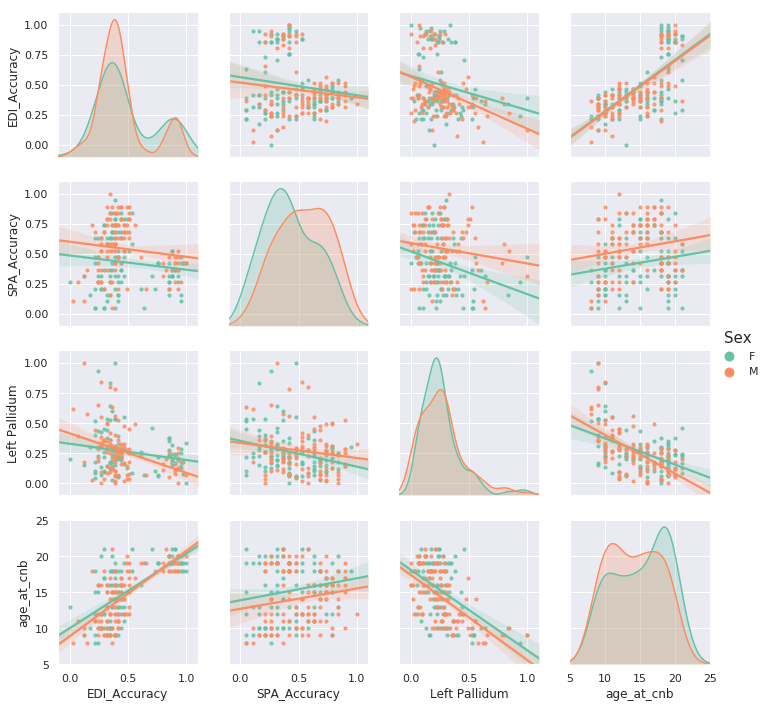

In [43]:
# scatter plot of behav scores in one cluster:

behav_feature = pd.read_csv(result_dir+'/out01_behav_feature.csv', index_col=0)
behav_feature.dropna(axis='index', inplace = True)
behav_feature['Sex'] = behav_feature['Sex'].apply({-1:'F', 1:'M'}.get)
# print(behav_feature)
g = sns.pairplot(behav_feature,  kind="reg", hue = 'Sex', plot_kws=dict(scatter_kws=dict(s=10)),
                 vars=['EDI_Accuracy', 'SPA_Accuracy', 'Left Pallidum', 'age_at_cnb'], palette="Set2", dropna = True)

plot_rows = 4
for idx1 in range(plot_rows-1):
    for idx2 in range(plot_rows-1):
        g.axes[idx1, idx2].set_xlim(-.1, 1.1)
        g.axes[idx1, idx2].set_ylim(-.1, 1.1)


for idx in range(plot_rows):
    g.axes[idx, plot_rows-1].set_xlim(5, 25)
    g.axes[plot_rows-1, idx].set_ylim(5, 25)

plt.setp(g._legend.get_title(), fontsize=15)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [80] 

In [44]:
print(coefs_data.loc[coefs_data['cluster']==7,:].shape)
coefs_data.loc[coefs_data['cluster']==7,:].sort_values(by='Rsquare', ascending=False)

(21, 10)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,cluster,cluster_gmm
107,Right Superior Temporal,gmv,0.504162,0.012905,0.526749,0.054988,0.001510,0.469682,7,111.0
33,Right Middle Frontal,gmv,0.365043,0.008709,0.800616,0.095818,0.003108,0.434894,7,111.0
111,Right Middle Temporal,gmv,0.363534,0.008890,0.811023,0.085645,0.002569,0.409000,7,111.0
89,Right Supramarginal,gmv,0.455837,0.011293,0.709284,0.105550,0.003816,0.396057,7,111.0
87,Right Inferior Parietal,gmv,0.405636,0.009817,0.567220,0.073395,0.002305,0.391650,7,111.0
110,Left Middle Temporal,gmv,0.443025,0.011502,0.869954,0.103747,0.003359,0.388619,7,111.0
6,LAN_Accuracy,behav,0.458264,0.012688,0.648525,0.124680,0.004609,0.348552,7,111.0
158,Anterior.limb.of.internal.capsule.R,label_fa,0.513163,0.014301,0.701831,0.091964,0.003276,0.301077,7,111.0
176,Cingulum.(cingulate.gyrus).R,label_fa,0.413813,0.011050,0.652070,0.084304,0.003136,0.300761,7,111.0
197,Cingulum.(cingulate.gyrus).R,tract_fa,0.413813,0.011050,0.652070,0.084304,0.003136,0.300761,7,111.0


In [45]:
print(coefs_data.loc[coefs_data['cluster']==8,:].shape)
coefs_data.loc[coefs_data['cluster']==8,:].sort_values(by='Rsquare', ascending=False)

(13, 10)


,Unnamed: 0,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,cluster,cluster_gmm
60,Left Cingulum,gmv,0.215848,0.004856,0.731316,0.037418,0.000674,0.367502,8,5.0
119,Cerebellum_Crus2_R,gmv,0.143145,0.001502,0.247913,0.022441,0.000432,0.281077,8,8.0
118,Cerebellum_Crus2_L,gmv,0.079905,0.000682,0.533703,0.079165,0.001865,0.191886,8,8.0
46,Left Olfactory,gmv,0.149391,0.001586,0.220943,0.044303,0.001717,0.182349,8,5.0
117,Cerebellum_Crus1_R,gmv,0.140820,0.002427,0.519313,0.044246,0.000318,0.181251,8,5.0
116,Cerebellum_Crus1_L,gmv,0.069776,0.000419,0.635318,0.069542,0.001139,0.164314,8,8.0
80,Left Fusiform,gmv,0.216519,0.005126,0.114558,0.024219,0.001499,0.159495,8,5.0
29,Right Superior Frontal,gmv,0.115460,0.001709,0.282321,0.014878,0.000290,0.159415,8,8.0
66,Left Amygdala,gmv,0.219576,0.005043,0.130187,0.023519,0.001533,0.138514,8,5.0
79,Right Inferior Occipital,gmv,0.033670,0.001217,0.137362,0.017873,0.000858,0.133791,8,8.0


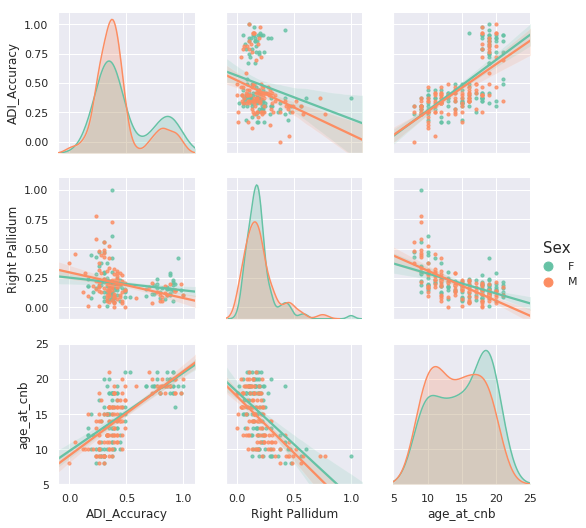

In [46]:
# scatter plot of behav scores in one cluster:

behav_feature = pd.read_csv(result_dir+'/out01_behav_feature.csv', index_col=0)
behav_feature.dropna(axis='index', inplace = True)
behav_feature['Sex'] = behav_feature['Sex'].apply({-1:'F', 1:'M'}.get)
# print(behav_feature)
g = sns.pairplot(behav_feature,  kind="reg", hue = 'Sex', plot_kws=dict(scatter_kws=dict(s=10)),
                 vars=['ADI_Accuracy', 'Right Pallidum', 'age_at_cnb'], palette="Set2", dropna = True)

plot_rows = 3
for idx1 in range(plot_rows-1):
    for idx2 in range(plot_rows-1):
        g.axes[idx1, idx2].set_xlim(-.1, 1.1)
        g.axes[idx1, idx2].set_ylim(-.1, 1.1)


for idx in range(plot_rows):
    g.axes[idx, plot_rows-1].set_xlim(5, 25)
    g.axes[plot_rows-1, idx].set_ylim(5, 25)

plt.setp(g._legend.get_title(), fontsize=15)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [80] 

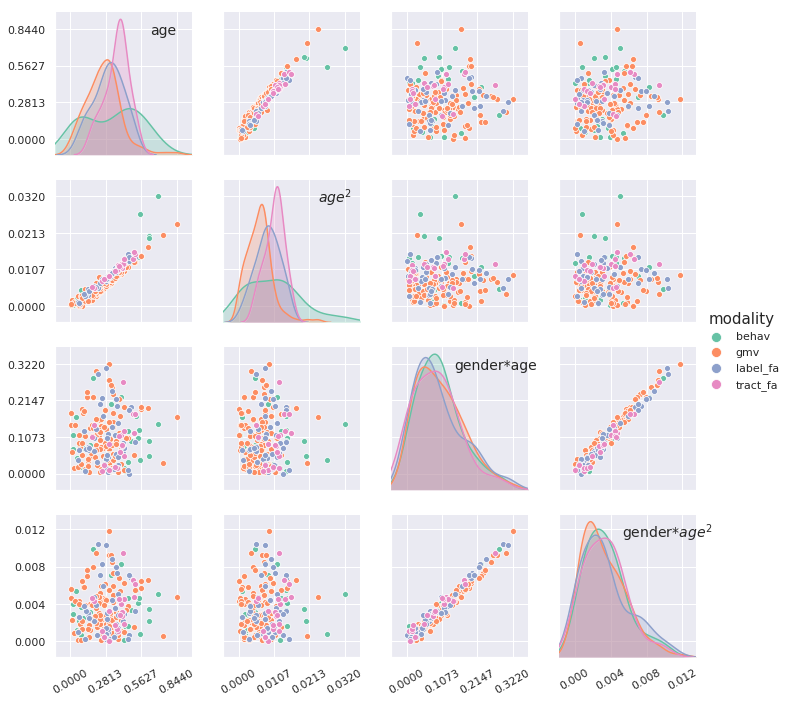

In [47]:
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 1)

row_idx = coefs_data['cluster']>0
g = sns.pairplot(coefs_data.loc[row_idx,:], kind="scatter", hue="modality",
                 vars=['age', 'age$^2$', 'age*gender', 'age*gender$^2$'], palette="Set2")

text_size = 14
g.axes[0, 0].text(max(coefs_data.loc[row_idx, columns[0]])*.75, max(coefs_data.loc[row_idx, columns[0]])*.95, 
                  'age', fontsize = text_size)
g.axes[1, 1].text(max(coefs_data.loc[row_idx, columns[1]])*.75, max(coefs_data.loc[row_idx, columns[1]])*.95, 
                  '$age^2$', fontsize = text_size)
g.axes[2, 2].text(max(coefs_data.loc[row_idx, columns[2]])*.45, max(coefs_data.loc[row_idx, columns[2]])*.95, 
                  'gender*age', fontsize = text_size)
g.axes[3, 3].text(max(coefs_data.loc[row_idx, columns[3]])*.45, max(coefs_data.loc[row_idx, columns[3]])*.95, 
                  'gender*$age^2$', fontsize = text_size)

num_vars = len(columns)

for idx in range(num_vars):
    g.axes[num_vars-1, idx].set_xlabel('')
    g.axes[idx, 0].set_ylabel('')

for idx1 in range(num_vars):
    for idx2 in range(num_vars):
        offset1 = (max(coefs_data.loc[row_idx, columns[idx1]]) - min(coefs_data.loc[row_idx, columns[idx1]]))*.15
        offset2 = (max(coefs_data.loc[row_idx, columns[idx2]]) - min(coefs_data.loc[row_idx, columns[idx2]]))*.15
        
        limit_idx1 = [min(coefs_data.loc[row_idx, columns[idx1]])-offset1, 
                      max(coefs_data.loc[row_idx, columns[idx1]])+offset1]
        
        limit_idx2 = [min(coefs_data.loc[row_idx, columns[idx2]])-offset2,
                      max(coefs_data.loc[row_idx, columns[idx2]])+offset2]
        
        g.axes[idx1, idx2].set_ylim(limit_idx1[0], limit_idx1[1])
        g.axes[idx1, idx2].set_yticks(np.round(np.linspace(0, round(limit_idx1[1]-offset1,3), num=4), 4))
        
        g.axes[idx1, idx2].set_xlim(limit_idx2[0], limit_idx2[1])
        g.axes[idx1, idx2].set_xticks(np.round(np.linspace(0, round(limit_idx2[1]-offset2,3), num=4), 4))
        
        if idx1==num_vars-1:
            #g.axes[idx1, idx2].set_xticklabels(g.axes[idx1, idx2].get_xticklabels(), rotation=30)
            plt.setp(g.axes[idx1, idx2].get_xticklabels(), rotation=30)
    


plt.setp(g._legend.get_title(), fontsize=15)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 

plt.show()
